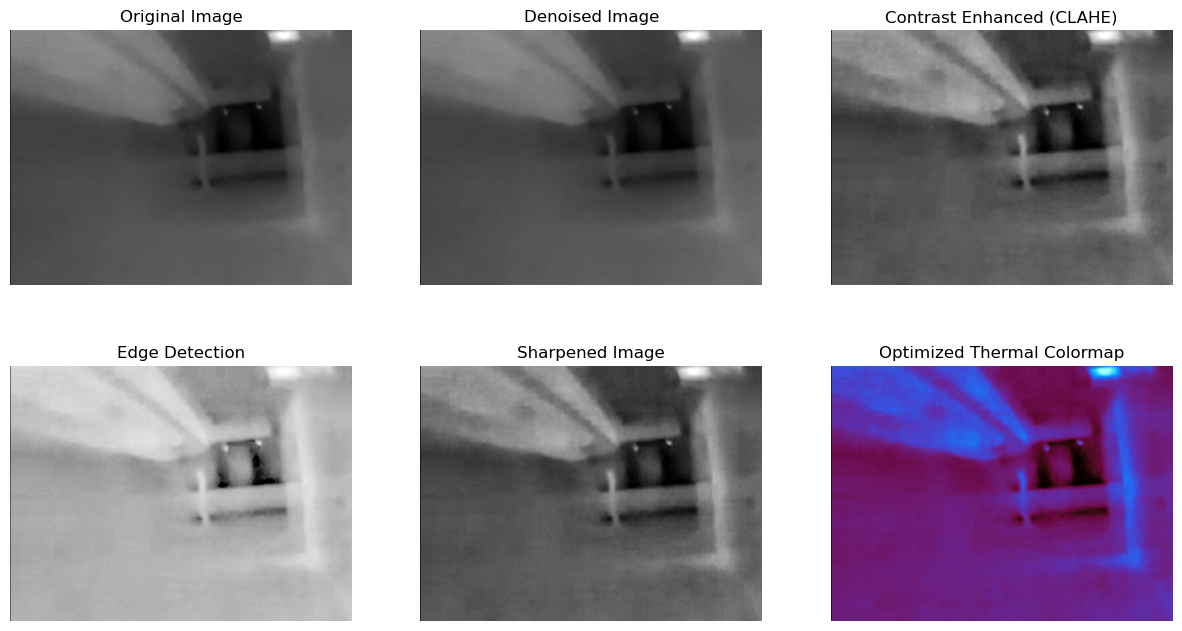

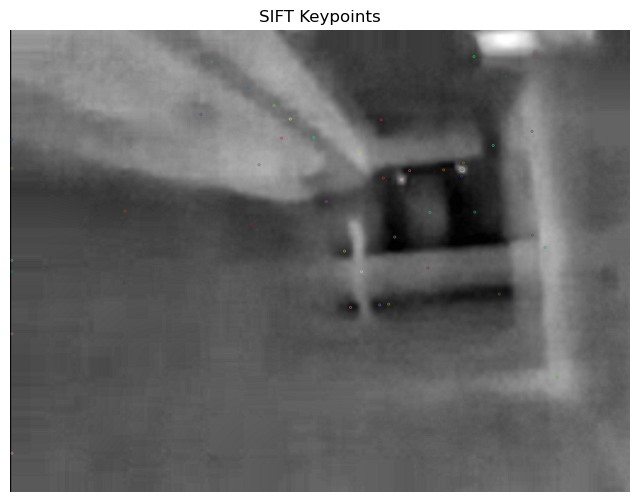

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the thermal image (Grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Noise Removal (Denoising)
denoised = cv2.GaussianBlur(image, (5, 5), 0)  # Gaussian Blur for smoothing

# Step 3: Contrast Enhancement (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced = clahe.apply(denoised)



# Step 4: Edge Detection (Laplacian Filter)
# edges = cv2.Laplacian(enhanced, cv2.CV_64F)
# edges = np.uint8(np.absolute(edges))  # Convert to 8-bit image
# edges = cv2.Canny(enhanced,100,200)

gamma = 0.2
t = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)
edges = cv2.LUT(enhanced, t)

# Step 5: Sharpening (Unsharp Masking)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(enhanced, -1, sharpening_kernel)

# Step 6: Apply a Thermal Color Map (Optional)
thermal_colored = cv2.applyColorMap(sharpened, cv2.COLORMAP_INFERNO)

# Step 7: SIFT Feature Detection
sift = cv2.SIFT_create()  # Initialize SIFT detector
keypoints, descriptors = sift.detectAndCompute(sharpened, None)  # Detect keypoints and compute descriptors

# Step 8: Draw Keypoints on the image
sift_image = cv2.drawKeypoints(sharpened, keypoints, None)  # Draw keypoints on the enhanced image

# Display Results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(denoised, cmap='gray')
plt.axis("off")
plt.title("Denoised Image")

plt.subplot(2, 3, 3)
plt.imshow(enhanced, cmap='gray')
plt.axis("off")
plt.title("Contrast Enhanced (CLAHE)")

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.title("Edge Detection")

plt.subplot(2, 3, 5)
plt.imshow(sharpened, cmap='gray')
plt.axis("off")
plt.title("Sharpened Image")

plt.subplot(2, 3, 6)
plt.imshow(thermal_colored)
plt.axis("off")
plt.title("Optimized Thermal Colormap")

# Display SIFT keypoints visualization
plt.figure(figsize=(8, 6))
plt.imshow(sift_image)
plt.axis("off")
plt.title("SIFT Keypoints")

plt.show()

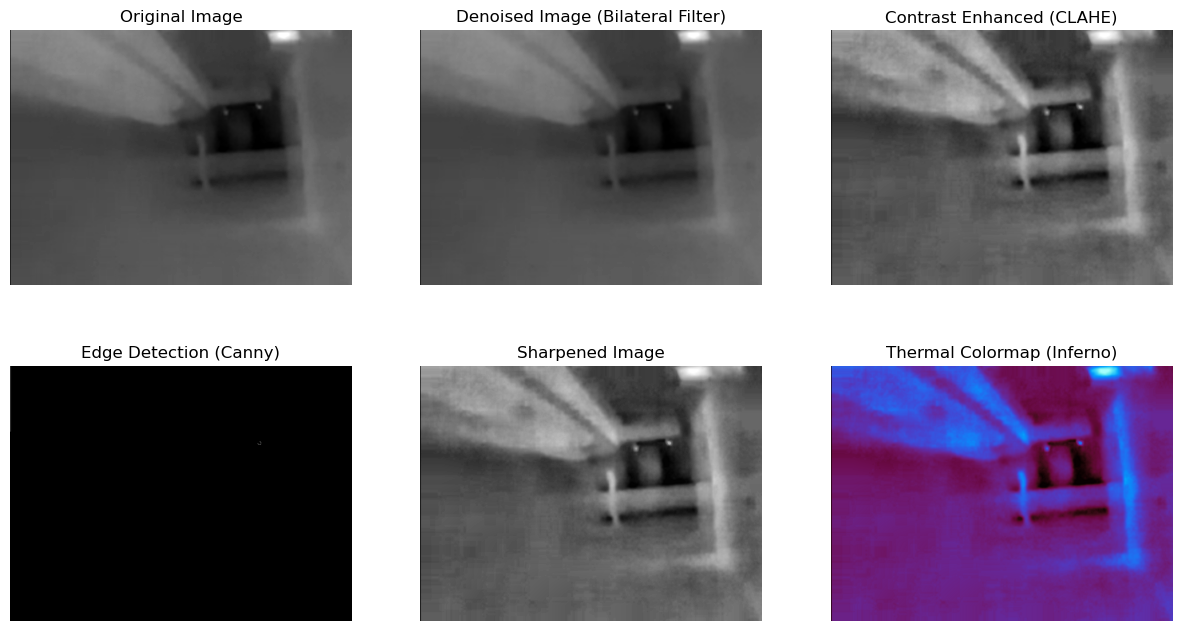

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the thermal image (Grayscale)
image = cv2.imread("./image.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Noise Removal (Denoising) using Bilateral Filter
denoised = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)  # Bilateral filter to reduce noise while preserving edges

# Step 3: Contrast Enhancement using CLAHE (Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
enhanced = clahe.apply(denoised)

# Step 4: Edge Detection using Canny Edge Detection

edges = cv2.Canny(enhanced, threshold1=150, threshold2=175)

# Step 5: Sharpening the image (Unsharp Masking)
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv2.filter2D(enhanced, -1, sharpening_kernel)

# Step 6: Morphological Operation (Optional) for Feature Extraction
kernel = np.ones((3, 3), np.uint8)
morph_opening = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)  # Removes small noise
morph_closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)  # Fills small holes

# Step 7: Apply Thermal Color Map (Optional)
thermal_colored = cv2.applyColorMap(sharpened, cv2.COLORMAP_INFERNO)

# Step 8: Display Results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(denoised, cmap='gray')
plt.axis("off")
plt.title("Denoised Image (Bilateral Filter)")

plt.subplot(2, 3, 3)
plt.imshow(enhanced, cmap='gray')
plt.axis("off")
plt.title("Contrast Enhanced (CLAHE)")

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.title("Edge Detection (Canny)")

plt.subplot(2, 3, 5)
plt.imshow(sharpened, cmap='gray')
plt.axis("off")
plt.title("Sharpened Image")

plt.subplot(2, 3, 6)
plt.imshow(thermal_colored)
plt.axis("off")
plt.title("Thermal Colormap (Inferno)")

plt.show()
